In [6]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import math

In [7]:
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score as f1
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.linear_model import LinearRegression as linreg
from sklearn.metrics import mean_squared_error as rmse
import pickle # to save the model

from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score ,roc_auc_score as auc, accuracy_score as acc, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve,average_precision_score,average_precision_score as aps,log_loss as ll

from pandas.core.common import SettingWithCopyWarning
from sklearn.exceptions import FitFailedWarning
import warnings
warnings.simplefilter(action='ignore', category=FitFailedWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [8]:
from sklearn.tree import DecisionTreeRegressor as dtr,export_graphviz
from sklearn.model_selection import GridSearchCV as gs, RandomizedSearchCV as rs
from sklearn.metrics import make_scorer
#import graphviz

## random state

In [9]:
r=6

In [10]:
data = pd.read_csv('spotify_data.csv')
data.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


## Missing Value

In [11]:
data.isnull().sum()

Position        0
Track Name    657
Artist        657
Streams         0
URL             8
Date            0
Region          0
dtype: int64

In [12]:
data.dropna(inplace=True)

## Preprocessing

### track_names

In [13]:
data.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [14]:
le = preprocessing.LabelEncoder()
#data['Track Name']=le.fit_transform(data['Track Name'])
data['Artist']=le.fit_transform(data['Artist'])
#data['Region']=le.fit_transform(data['Region'])

removing url column

In [15]:
data.drop(['URL'], axis=1,inplace=True)

In [16]:
data.head()

,Position,Track Name,Artist,Streams,Date,Region
0,1,Reggaetón Lento (Bailemos),897,19272,2017-01-01,ec
1,2,Chantaje,5194,19270,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),6331,15761,2017-01-01,ec
3,4,Vente Pa' Ca,4854,14954,2017-01-01,ec
4,5,Safari,2523,14269,2017-01-01,ec


## Date

In [17]:
data['Date'].max(), data['Date'].min()

('2018-01-09', '2017-01-01')

In [18]:
data['Date'] = pd.to_datetime(data['Date'], format= '%Y-%m-%d')
data.dtypes

Position               int64
Track Name            object
Artist                 int64
Streams                int64
Date          datetime64[ns]
Region                object
dtype: object

In [19]:
data['Date'].max(), data['Date'].min()

(Timestamp('2018-01-09 00:00:00'), Timestamp('2017-01-01 00:00:00'))

### extracting

year

In [20]:
data['Date'].dt.year

0          2017
1          2017
2          2017
3          2017
4          2017
           ... 
3441192    2018
3441193    2018
3441194    2018
3441195    2018
3441196    2018
Name: Date, Length: 3440540, dtype: int64

In [21]:
data['Date'].dt.year.value_counts()

2017    3355829
2018      84711
Name: Date, dtype: int64

month

In [22]:
data['Date'].dt.month

0          1
1          1
2          1
3          1
4          1
          ..
3441192    1
3441193    1
3441194    1
3441195    1
3441196    1
Name: Date, Length: 3440540, dtype: int64

In [23]:
data['Date'].dt.month.value_counts()

1     361156
12    297611
7     290305
10    289677
8     289439
3     285994
11    280138
9     280084
4     274391
6     269533
5     268020
2     254192
Name: Date, dtype: int64

day of month

In [24]:
data['Date'].dt.day

0          1
1          1
2          1
3          1
4          1
          ..
3441192    9
3441193    9
3441194    9
3441195    9
3441196    9
Name: Date, Length: 3440540, dtype: int64

In [25]:
data['Date'].dt.day.value_counts()[0:5]

8    120677
9    120677
7    120522
5    120435
4    120404
Name: Date, dtype: int64

In [26]:
len(data['Date'].dt.day.value_counts())

31

day of year

In [27]:
data['Date'].dt.dayofyear

0          1
1          1
2          1
3          1
4          1
          ..
3441192    9
3441193    9
3441194    9
3441195    9
3441196    9
Name: Date, Length: 3440540, dtype: int64

In [28]:
data['Date'].dt.dayofyear.value_counts()

5     18432
6     18402
9     18389
8     18220
4     18197
      ...  
23     8891
29     8889
11     8875
10     8840
15     8829
Name: Date, Length: 362, dtype: int64

In [29]:
len(data['Date'].dt.dayofyear.value_counts())

362

day of week

In [30]:
data['Date'].dt.dayofweek

0          6
1          6
2          6
3          6
4          6
          ..
3441192    1
3441193    1
3441194    1
3441195    1
3441196    1
Name: Date, Length: 3440540, dtype: int64

In [31]:
data['Date'].dt.dayofweek.value_counts()

0    497277
5    493745
3    493319
1    491527
6    491422
4    490420
2    482830
Name: Date, dtype: int64

day of week name

In [32]:
data['Date'].dt.day_name()

0           Sunday
1           Sunday
2           Sunday
3           Sunday
4           Sunday
            ...   
3441192    Tuesday
3441193    Tuesday
3441194    Tuesday
3441195    Tuesday
3441196    Tuesday
Name: Date, Length: 3440540, dtype: object

## Put it all together

In [33]:
date_data = pd.DataFrame({"Year": data['Date'].dt.year,
              "Month": data['Date'].dt.month,
              "Day Of Month": data['Date'].dt.day,
              "Day Of Year": data['Date'].dt.dayofyear,
              "Day Of Week": data['Date'].dt.dayofweek,
              "Day Of Week Name": data['Date'].dt.day_name()
             })
date_data.head()

,Year,Month,Day Of Month,Day Of Year,Day Of Week,Day Of Week Name
0,2017,1,1,1,6,Sunday
1,2017,1,1,1,6,Sunday
2,2017,1,1,1,6,Sunday
3,2017,1,1,1,6,Sunday
4,2017,1,1,1,6,Sunday


In [34]:
data.shape

(3440540, 6)

In [35]:
date_data.shape

(3440540, 6)

joining date_data to main data

In [36]:
data=data.join(date_data.set_index(data.index), on=data.index).copy()

removing date column

# removing 2018 data

In [37]:
data=data[data['Year']==2017].copy()

In [38]:
data.drop(['Date'], axis=1,inplace=True)

In [39]:
data.drop(['Day Of Week Name'], axis=1,inplace=True)

In [40]:
data.head()

,Position,Track Name,Artist,Streams,Region,Year,Month,Day Of Month,Day Of Year,Day Of Week
0,1,Reggaetón Lento (Bailemos),897,19272,ec,2017,1,1,1,6
1,2,Chantaje,5194,19270,ec,2017,1,1,1,6
2,3,Otra Vez (feat. J Balvin),6331,15761,ec,2017,1,1,1,6
3,4,Vente Pa' Ca,4854,14954,ec,2017,1,1,1,6
4,5,Safari,2523,14269,ec,2017,1,1,1,6


In [41]:
data.shape

(3355829, 10)

note for each track name there is one and only one artist so each track corresponds to one artist so for prediction artist variable is not required, for eda visualization and data analysis though we will require artist name and trck name

## making model

target column is position

In [42]:
target='Position'

In [43]:
le = preprocessing.LabelEncoder()
data['Track Name']=le.fit_transform(data['Track Name'])
data['Artist']=le.fit_transform(data['Artist'])
data['Region']=le.fit_transform(data['Region'])

In [44]:
data.drop(columns=['Track Name', 'Artist'],inplace=True)

In [45]:
x = (data[[z for z in data.columns.tolist() if z not in [target]]]).copy()
y = data[target].copy()
x.shape, y.shape

train_x,x1,train_y,y1 = train_test_split(x,y,test_size=0.4,random_state= r, stratify=y).copy()
test_x,val_x,test_y,val_y= train_test_split(x1, y1, test_size=0.5,random_state=r, stratify=y1).copy()

# Modelling

In [46]:
data.dtypes

Position        int64
Streams         int64
Region          int64
Year            int64
Month           int64
Day Of Month    int64
Day Of Year     int64
Day Of Week     int64
dtype: object

In [47]:
data.head()

,Position,Streams,Region,Year,Month,Day Of Month,Day Of Year,Day Of Week
0,1,19272,15,2017,1,1,1,6
1,2,19270,15,2017,1,1,1,6
2,3,15761,15,2017,1,1,1,6
3,4,14954,15,2017,1,1,1,6
4,5,14269,15,2017,1,1,1,6


In [48]:
dt=dtr(random_state=r)

# xgboost model

In [49]:
import xgboost as xgb
from xgboost import XGBRegressor as xgbr

In [50]:
xgbm=xgbr(random_state=r,verbosity=0)

In [51]:
xgbmmodel = xgbm
xgbmmodel.fit(train_x,train_y)
pred=xgbmmodel.predict(val_x)
predtr=xgbmmodel.predict(train_x)
predt=xgbmmodel.predict(test_x)
[rmse(test_y, predt,squared=True),rmse(val_y, pred,squared=True),rmse(train_y, predtr,squared=True)]

[120.14416988217695, 120.0958934582372, 118.28101957176413]

In [52]:
params={'learning_rate':0.03,'subsample':1,'colsample_bylevel':0.9,'colsample_bynode':0.9,'colsample_bytree':0.9}

In [53]:
dtrain = xgb.DMatrix(train_x, label=train_y, enable_categorical=True)
dval = xgb.DMatrix(val_x, label=val_y, enable_categorical=True)
watchlist = [(dtrain, 'train'), (dval, 'val')]
xgbmodel = xgb.train(dtrain=dtrain,num_boost_round=1500,evals=watchlist, early_stopping_rounds=1,
      maximize=False, verbose_eval=10 ,params=params)
xbgmpredict={'ntree_limit':xgbmodel.best_ntree_limit}
print('Modeling RMSE %.5f' % xgbmodel.best_score)

[0]	train-rmse:107.53387	val-rmse:107.53466
[10]	train-rmse:86.07295	val-rmse:86.07454
[20]	train-rmse:71.53435	val-rmse:71.53851
[30]	train-rmse:61.87415	val-rmse:61.88079
[40]	train-rmse:55.46118	val-rmse:55.47272
[50]	train-rmse:50.29715	val-rmse:50.31365
[60]	train-rmse:47.18761	val-rmse:47.20741
[70]	train-rmse:45.18269	val-rmse:45.20959
[80]	train-rmse:43.76424	val-rmse:43.79773
[90]	train-rmse:42.16228	val-rmse:42.19955
[100]	train-rmse:40.89498	val-rmse:40.92973
[110]	train-rmse:39.87160	val-rmse:39.90501
[120]	train-rmse:38.89062	val-rmse:38.92203
[130]	train-rmse:38.24640	val-rmse:38.27896
[140]	train-rmse:37.19486	val-rmse:37.22591
[150]	train-rmse:35.92883	val-rmse:35.95722
[160]	train-rmse:35.27581	val-rmse:35.30306
[170]	train-rmse:34.41087	val-rmse:34.43578
[180]	train-rmse:33.83334	val-rmse:33.86276
[190]	train-rmse:33.25268	val-rmse:33.28182
[200]	train-rmse:32.39953	val-rmse:32.42789
[210]	train-rmse:31.87731	val-rmse:31.90861
[220]	train-rmse:31.28585	val-rmse:31.316

In [54]:
xgbmodel.best_score

9.193596

In [55]:
xbgmpredict

{'ntree_limit': 1500}

In [56]:
# save the model to the current directory for later use


# write
pkl_filename = "xgbbestmodel.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(xgbmmodel, file)


# Load from file
with open(pkl_filename, 'rb') as file:
    xgbm_best_model = pickle.load(file)
    
# Calculate MSE values from saved model
pred=xgbm_best_model.predict(val_x)
predtr=xgbm_best_model.predict(train_x)
predt=xgbm_best_model.predict(test_x)
[rmse(test_y, predt,squared=True),rmse(val_y, pred,squared=True),rmse(train_y, predtr,squared=True)]

# Parameters of the model
xgbm_best_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 6,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0}

# random forest model

In [57]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestRegressor as rtr

In [58]:
rt=rtr(random_state=r,warm_start=False,criterion='entropy')

In [59]:
rtmodel=rtr()
rtmodel.fit(train_x,train_y)
pred=rtmodel.predict(test_x)
predt=rtmodel.predict(val_x)
predtr=rtmodel.predict(train_x)
[rmse(test_y, pred,squared=True),rmse(val_y, predt,squared=True),rmse(train_y, predtr,squared=True)]

[3.933626622577542, 3.8805633344481136, 0.5684197102192705]

In [60]:
print('Classification accuracy on training set: {:.3f}'.format(rtmodel.score(train_x, train_y)))
print('Classification accuracy on test set: {:.3f}'.format(rtmodel.score(test_x, test_y)))
rt.get_params()


Classification accuracy on training set: 1.000
Classification accuracy on test set: 0.999


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 6,
 'verbose': 0,
 'warm_start': False}

In [61]:
#save base random forest for later
# write
pkl_filename = "rfbasemodel.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rtmodel, file)


# Load from file
with open(pkl_filename, 'rb') as file:
    rf_model = pickle.load(file)
    
# Calculate MSE values from saved model
pred=rf_model.predict(val_x)
predtr=rf_model.predict(train_x)
predt=rf_model.predict(test_x)
[rmse(test_y, predt,squared=True),rmse(val_y, pred,squared=True),rmse(train_y, predtr,squared=True)]

# Parameters of the model
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [62]:
rf_model.feature_importances_

array([0.41145448, 0.50999401, 0.        , 0.00338535, 0.00492783,
       0.05554373, 0.0146946 ])

## decision tree

In [68]:
dtmodel = dtr(random_state=r,criterion='squared_error')
dtmodel.fit(train_x,train_y)
pred=dtmodel.predict(val_x)
predtr=dtmodel.predict(train_x)
[rmse(val_y, pred,squared=True),rmse(train_y, predtr,squared=True)]

[7.1493946107719015, 0.004942396238981233]

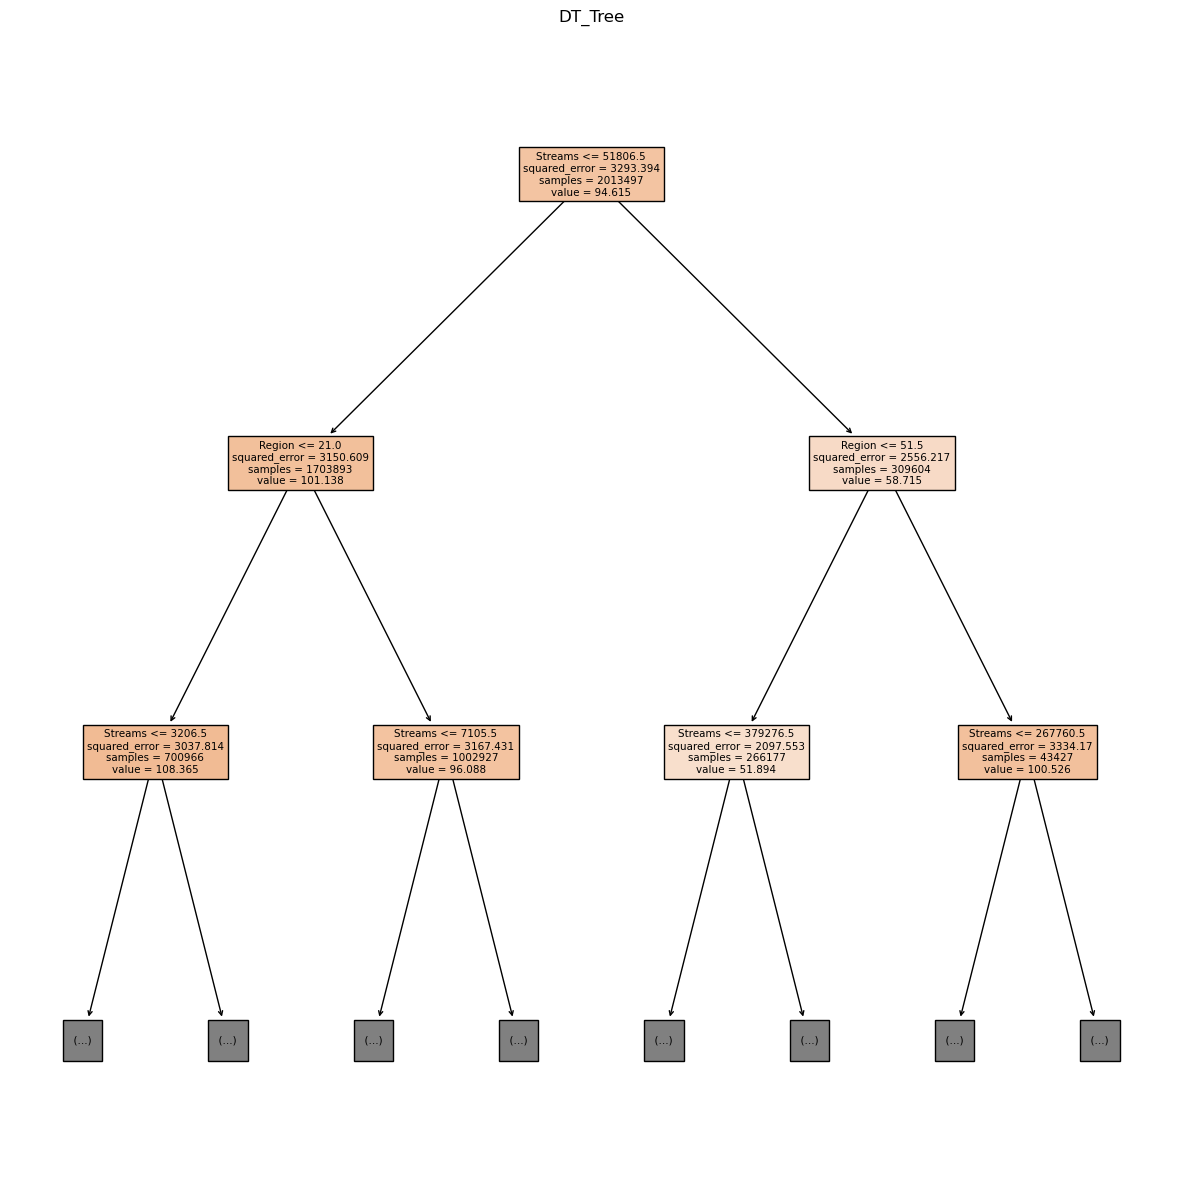

In [69]:
from sklearn.tree import plot_tree
dtmodel.fit(train_x,train_y)
plt.figure(figsize=(15,15))
plot_tree(dtmodel, feature_names=train_x.columns, filled=True, max_depth=2)
plt.title('DT_Tree')
plt.show()